# Modeling and Simulation - Bike Share System
Introduction to Modeling and Simulation

**What is a Model?**

In the context of science and engineering, a model is a simplified representation of a real-world system. The goal of a model is to capture the essential features of the system in a way that allows us to predict its behavior. Models can be mathematical, physical, or computational.

For example, imagine we are trying to understand a bike share system in a city. A city might have a number of bike stations, each with a certain number of bikes. People can borrow bikes from any station and return them to any other station. Our task is to model this system in a simplified form to understand how well the system works and how to make it more efficient.

**What is a Simulation?**

A simulation is a process of using a model to study the behavior of a system over time. Simulations are often used when it's difficult or impossible to study the actual system directly. By simulating a system, we can ask "what if" questions and test how the system responds to different conditions.

<div style="display: flex;">
    <div>
        <img src="https://drive.google.com/uc?export=view&id=1jkKAp3Z1Dw23aX7rqFcamRJn18sZgnsi" alt="Description" width="150" style="float: right; margin-left: 20px;">
    </div>
</div>

In this lab, we will use Python to build a simple simulation of a bike share system and study how it behaves under different conditions.

**Defining the System**

Imagine a city that has set up a bike-sharing program. There are multiple stations scattered across the city, each station equipped with bikes and docks.

Stations are the places where the bikes are stored. Each station has a limited number of bikes and a limited number of docks (parking spots for bikes). Some stations might be busier than others, and the number of bikes can vary from station to station at different times of the day.

Bikes are what people use for transport. We don't need to track each individual bike (for simplicity), but we do care about how many bikes are available at each station.

Trips represent the movement of bikes. A trip occurs when a person picks up a bike from one station and drops it off at another. The goal of the system is to ensure that bikes are available when people need them, and that there are enough empty docks when people return the bikes.


---



The Challenge:
Even in a simple bike-sharing system, you still need to manage the following:

* Bike Availability: A station can't provide a bike if it's empty.
* Dock Availability: A station can't accept a returned bike if all docks are full.
* Trips: As bikes move from one station to another, we track where they are picked up and dropped off.

### Basic Python Modelling

In [ ]:
# Model your bike system using basic python below
# Hidden
station_upt = 7 # start number of bikes at UPT
station_center = 10 # start number of bikes at Center
max_bikes_upt = 15
max_bikes_center = 15

def send_bike_to_center():
    global station_upt, station_center
    if station_upt > 0 and station_center < max_bikes_center:
        station_upt -= 1
        station_center += 1

def send_bike_to_upt():
    global station_upt, station_center
    if station_center > 0 and station_upt < max_bikes_upt:
        station_center -= 1
        station_upt += 1


In [ ]:
# Hidden
print('UPT bikes:', station_upt, 'Center bikes:', station_center)
send_bike_to_center()
print('UPT bikes:', station_upt, 'Center bikes:', station_center)
send_bike_to_center()
print('UPT bikes:', station_upt, 'Center bikes:', station_center)


UPT bikes: 2 Center bikes: 15
UPT bikes: 2 Center bikes: 15
UPT bikes: 2 Center bikes: 15


### Python Classes Introduction

In [ ]:
# Defining a Class: A class is defined using the class keyword
class MyClass:
    pass  # This creates an empty class

**Constructor** (__init__ method): The __init__ method is a special function that gets called when an object (instance of the class) is created. It initializes the attributes of the object.

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name  # Attribute
        self.age = age    # Attribute

# self refers to the current instance of the class.
# Attributes like name and age are created and initialized in the constructor.

Creating an Object (Instance): To create an instance (object) of a class, you call the class as if it were a function:

In [ ]:
person1 = Person("Alice", 30)  # Creates a Person object with name "Alice" and age 30
print(person1.name)  # Output: Alice

Alice


Methods: Methods are functions defined inside a class that operate on the instance’s data (attributes).

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def greet(self):
        print(f"Hello, my name is {self.name} and I'm {self.age} years old.")

person1 = Person("Alice", 30)
person1.greet()  # Output: Hello, my name is Alice and I'm 30 years old.

Hello, my name is Alice and I'm 30 years old.


Let's write our bikesharing system using Python classes now, allowing us to generalize to any number of stations.

In [ ]:
# Hidden
# Write the system using Python Classes
class Station:
    def __init__(self, name, bikes, capacity):
        self.name = name            # Station name
        self.bikes = bikes          # Number of bikes available
        self.capacity = capacity    # Station capacity

    def status(self):
        return f"{self.name}: {self.bikes}/{self.capacity} bikes available in {self.name}"

    def send_bike(self, other_station):
        if self.bikes > 0 and other_station.bikes < other_station.capacity:
            self.bikes -= 1
            other_station.bikes += 1
            return True
        return False

# Creating an instance of Station
station_A = Station("Station A", 5, 10)
station_B = Station("Station B", 0, 10)

# Accessing attributes
print(station_A.name)  # Output: Station A

# Accessing methods
print(station_A.status())

station_A.send_bike(station_B)
print(station_A.status())
print(station_B.status())

Station A
Station A: 5/10 bikes available in Station A
Station A: 4/10 bikes available in Station A
Station B: 1/10 bikes available in Station B


### Introducing Probabilities and Time


In this extended version of the bike-sharing system, we introduce probabilities and time to simulate trips between stations over a set period. We aim to model the likelihood of bike movement between stations at each minute. We will use the following probabilities:

* 0.3 probability: On average, there is a 30% chance per minute that a bike will be taken from the UPT station to the Center station.
* 0.5 probability: On average, there is a 50% chance per minute that a bike will be taken from the Center station to the UPT station.

In [ ]:
# Extend implementation to simulate a couple of times what happens with the system in a 30 minutes period
# Hidden
import random

# Class for a Station
class Station:
    def __init__(self, name, bikes, capacity):
        self.name = name            # Station name
        self.bikes = bikes          # Number of bikes available
        self.capacity = capacity    # Station capacity

    # Method to show station status
    def status(self):
        return f"{self.name}: {self.bikes}/{self.capacity} bikes available in {self.name}"

    # Method to send a bike from this station to another station
    def send_bike(self, other_station):
        if self.bikes > 0 and other_station.bikes < other_station.capacity:
            self.bikes -= 1
            other_station.bikes += 1
            return True
        return False

# Function to simulate trips based on probabilities over a given period of time
def simulate_trips(upt, center, minutes, prob_upt_to_center=0.3, prob_center_to_upt=0.5):
    for minute in range(minutes):
        print(f"\n--- Minute {minute + 1} ---")

        # 30% chance to send a bike from UPT to Center
        if random.random() < prob_upt_to_center:
            success = upt.send_bike(center)
            if success:
                print(f"Bike sent from {upt.name} to {center.name}")
            else:
                print(f"Failed to send bike from {upt.name} to {center.name}")

        # 50% chance to send a bike from Center to UPT
        if random.random() < prob_center_to_upt:
            success = center.send_bike(upt)
            if success:
                print(f"Bike sent from {center.name} to {upt.name}")
            else:
                print(f"Failed to send bike from {center.name} to {upt.name}")

        # Display station statuses at the end of each minute
        print(upt.status())
        print(center.status())

# Create stations
upt_station = Station("UPT", 5, 10)
center_station = Station("Center", 7, 12)

# Run the simulation for 30 minutes
simulate_trips(upt_station, center_station, minutes=30, prob_upt_to_center=0.3, prob_center_to_upt=0.5)



--- Minute 1 ---
Bike sent from Center to UPT
UPT: 6/10 bikes available in UPT
Center: 6/12 bikes available in Center

--- Minute 2 ---
Bike sent from UPT to Center
UPT: 5/10 bikes available in UPT
Center: 7/12 bikes available in Center

--- Minute 3 ---
Bike sent from Center to UPT
UPT: 6/10 bikes available in UPT
Center: 6/12 bikes available in Center

--- Minute 4 ---
Bike sent from Center to UPT
UPT: 7/10 bikes available in UPT
Center: 5/12 bikes available in Center

--- Minute 5 ---
UPT: 7/10 bikes available in UPT
Center: 5/12 bikes available in Center

--- Minute 6 ---
Bike sent from Center to UPT
UPT: 8/10 bikes available in UPT
Center: 4/12 bikes available in Center

--- Minute 7 ---
UPT: 8/10 bikes available in UPT
Center: 4/12 bikes available in Center

--- Minute 8 ---
UPT: 8/10 bikes available in UPT
Center: 4/12 bikes available in Center

--- Minute 9 ---
Bike sent from Center to UPT
UPT: 9/10 bikes available in UPT
Center: 3/12 bikes available in Center

--- Minute 10 -

### Save logs and plot data for analysis

To perform some analysis and visualize the results of the bike-sharing simulation, we can record the number of bikes at each station over time and then plot this data using the matplotlib library. This will help us understand how the bike availability at each station changes over time based on the probabilities.


--- Minute 1 ---
Bike sent from UPT to Center
UPT: 4/10 bikes available in UPT
Center: 8/12 bikes available in Center

--- Minute 2 ---
Bike sent from UPT to Center
Bike sent from Center to UPT
UPT: 4/10 bikes available in UPT
Center: 8/12 bikes available in Center

--- Minute 3 ---
Bike sent from UPT to Center
UPT: 3/10 bikes available in UPT
Center: 9/12 bikes available in Center

--- Minute 4 ---
UPT: 3/10 bikes available in UPT
Center: 9/12 bikes available in Center

--- Minute 5 ---
UPT: 3/10 bikes available in UPT
Center: 9/12 bikes available in Center

--- Minute 6 ---
UPT: 3/10 bikes available in UPT
Center: 9/12 bikes available in Center

--- Minute 7 ---
Bike sent from UPT to Center
Bike sent from Center to UPT
UPT: 3/10 bikes available in UPT
Center: 9/12 bikes available in Center

--- Minute 8 ---
UPT: 3/10 bikes available in UPT
Center: 9/12 bikes available in Center

--- Minute 9 ---
Bike sent from Center to UPT
UPT: 4/10 bikes available in UPT
Center: 8/12 bikes availab

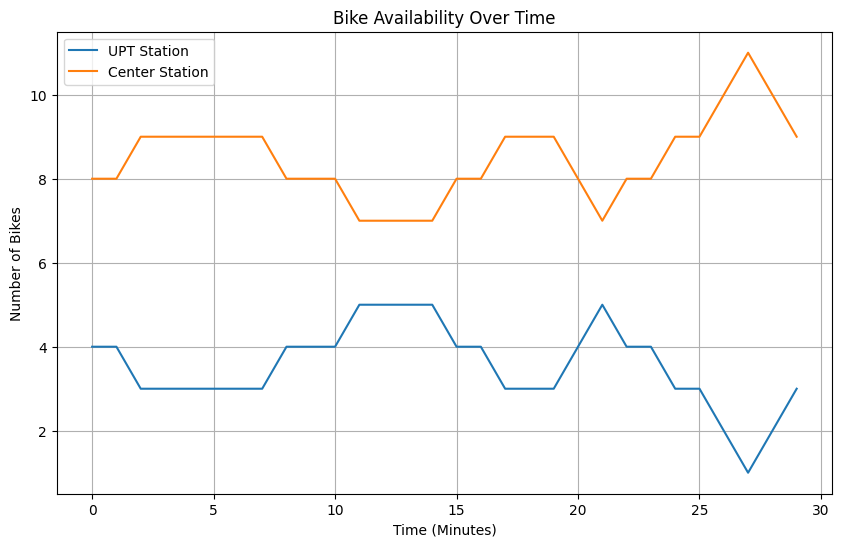

In [ ]:
# Hidden
# Save history at each minute and add plotting of said history
import random
import matplotlib.pyplot as plt

# Class for a Station
class Station:
    def __init__(self, name, bikes, capacity):
        self.name = name            # Station name
        self.bikes = bikes          # Number of bikes available
        self.capacity = capacity

    # Method to show station status
    def status(self):
        return f"{self.name}: {self.bikes}/{self.capacity} bikes available in {self.name}"

    # Method to send a bike from this station to another station
    def send_bike(self, other_station):
        if self.bikes > 0 and other_station.bikes < other_station.capacity:
            self.bikes -= 1
            other_station.bikes += 1
            return True
        return False

# Function to simulate trips and record bike availability over time
def simulate_trips(upt, center, minutes, prob_upt_to_center=0.3, prob_center_to_upt=0.5):
    # Data storage for analysis
    upt_bikes_over_time = []
    center_bikes_over_time = []

    # Run the simulation for the specified number of minutes
    for minute in range(minutes):
        print(f"\n--- Minute {minute + 1} ---")

        # 30% chance to send a bike from UPT to Center
        if random.random() < prob_upt_to_center:
            success = upt.send_bike(center)
            if success:
                print(f"Bike sent from {upt.name} to {center.name}")
            else:
                print(f"Failed to send bike from {upt.name} to {center.name}")

        # 50% chance to send a bike from Center to UPT
        if random.random() < prob_center_to_upt:
            success = center.send_bike(upt)
            if success:
                print(f"Bike sent from {center.name} to {upt.name}")
            else:
                print(f"Failed to send bike from {center.name} to {upt.name}")

        # Record the number of bikes at both stations
        upt_bikes_over_time.append(upt.bikes)
        center_bikes_over_time.append(center.bikes)

        # Display station statuses at the end of each minute
        print(upt.status())
        print(center.status())

    return upt_bikes_over_time, center_bikes_over_time

# Create stations
upt_station = Station("UPT", 5, 10)
center_station = Station("Center", 7, 12)

# Run the simulation for 30 minutes and record data
upt_bikes, center_bikes = simulate_trips(upt_station, center_station, minutes=30, prob_upt_to_center=0.5, prob_center_to_upt=0.5)

# Step 2: Plot the recorded data
plt.figure(figsize=(10, 6))
plt.plot(upt_bikes, label='UPT Station')
plt.plot(center_bikes, label='Center Station')
plt.title("Bike Availability Over Time")
plt.xlabel("Time (Minutes)")
plt.ylabel("Number of Bikes")
plt.legend()
plt.grid(True)
plt.show()


### Analyze events - Unhappy customers

Every time a rider can not get his bike because of the station being empty or being unable to return his bike to target station because of it being full, he will leave unhappy. We can track the number of times this occurs by simulating our system multiple times. We can vary the system variable and check average number of dissatisfied customers per hour for each of our setups. E.g. we leave more bikes in circulation, less bikes in circulation, we increase the number of max bike slots per station, etc.

Running simulation 1/50
Running simulation 2/50
Running simulation 3/50
Running simulation 4/50
Running simulation 5/50
Running simulation 6/50
Running simulation 7/50
Running simulation 8/50
Running simulation 9/50
Running simulation 10/50
Running simulation 11/50
Running simulation 12/50
Running simulation 13/50
Running simulation 14/50
Running simulation 15/50
Running simulation 16/50
Running simulation 17/50
Running simulation 18/50
Running simulation 19/50
Running simulation 20/50
Running simulation 21/50
Running simulation 22/50
Running simulation 23/50
Running simulation 24/50
Running simulation 25/50
Running simulation 26/50
Running simulation 27/50
Running simulation 28/50
Running simulation 29/50
Running simulation 30/50
Running simulation 31/50
Running simulation 32/50
Running simulation 33/50
Running simulation 34/50
Running simulation 35/50
Running simulation 36/50
Running simulation 37/50
Running simulation 38/50
Running simulation 39/50
Running simulation 40/50
Running s

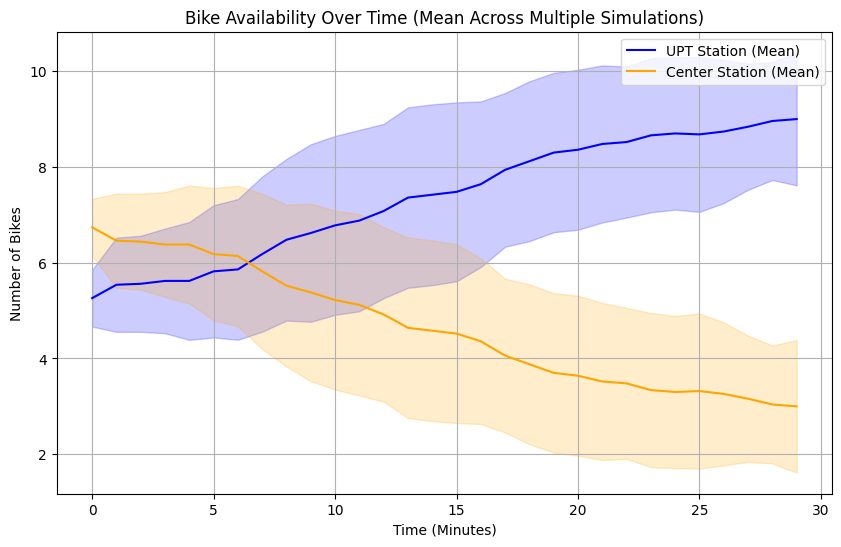

In [ ]:
# Hidden
# Write your multi-run analysis below
import random
import matplotlib.pyplot as plt
import numpy as np

# Class for a Station
class Station:
    def __init__(self, name, bikes, capacity):
        self.name = name            # Station name
        self.bikes = bikes          # Number of bikes available
        self.capacity = capacity

    def status(self):
        return f"{self.name}: {self.bikes}/{self.capacity} bikes available in {self.name}"

    def send_bike(self, other_station):
        if self.bikes > 0 and other_station.bikes < other_station.capacity:
            self.bikes -= 1
            other_station.bikes += 1
            return True
        return False

# Function to simulate trips and record bike availability over time
def simulate_trips(upt, center, minutes, prob_upt_to_center=0.3, prob_center_to_upt=0.5):
    # Data storage for each run
    upt_bikes_over_time = []
    center_bikes_over_time = []

    # Run the simulation for the specified number of minutes
    for minute in range(minutes):
        # 30% chance to send a bike from UPT to Center
        if random.random() < prob_upt_to_center:
            upt.send_bike(center)

        # 50% chance to send a bike from Center to UPT
        if random.random() < prob_center_to_upt:
            center.send_bike(upt)

        # Record the number of bikes at both stations
        upt_bikes_over_time.append(upt.bikes)
        center_bikes_over_time.append(center.bikes)

    return upt_bikes_over_time, center_bikes_over_time

# Function to run multiple simulations
def run_multiple_simulations(num_simulations, minutes, prob_upt_to_center=0.3, prob_center_to_upt=0.5):
    all_upt_bikes = []
    all_center_bikes = []

    for sim in range(num_simulations):
        print(f"Running simulation {sim + 1}/{num_simulations}")

        # Reset stations for each simulation
        upt_station = Station("UPT", 5, 10)
        center_station = Station("Center", 7, 12)

        # Run the simulation for this instance
        upt_bikes, center_bikes = simulate_trips(upt_station, center_station, minutes, prob_upt_to_center, prob_center_to_upt)

        # Store the results of each run
        all_upt_bikes.append(upt_bikes)
        all_center_bikes.append(center_bikes)

    return all_upt_bikes, all_center_bikes

# Step 2: Running the simulation 50 times for 30 minutes
num_simulations = 50
minutes = 30

all_upt_bikes, all_center_bikes = run_multiple_simulations(num_simulations, minutes)

# Step 3: Analysis - Calculate averages over time across simulations

# Convert lists to numpy arrays for easier analysis
upt_bikes_np = np.array(all_upt_bikes)
center_bikes_np = np.array(all_center_bikes)

# Calculate the mean number of bikes at each station over time
upt_bikes_mean = np.mean(upt_bikes_np, axis=0)
center_bikes_mean = np.mean(center_bikes_np, axis=0)

# Calculate the standard deviation to measure variability
upt_bikes_std = np.std(upt_bikes_np, axis=0)
center_bikes_std = np.std(center_bikes_np, axis=0)

# Step 4: Plotting the results

plt.figure(figsize=(10, 6))

# Plot the mean with error bars to show variability (mean ± std deviation)
plt.plot(upt_bikes_mean, label='UPT Station (Mean)', color='blue')
plt.fill_between(range(minutes), upt_bikes_mean - upt_bikes_std, upt_bikes_mean + upt_bikes_std, color='blue', alpha=0.2)

plt.plot(center_bikes_mean, label='Center Station (Mean)', color='orange')
plt.fill_between(range(minutes), center_bikes_mean - center_bikes_std, center_bikes_mean + center_bikes_std, color='orange', alpha=0.2)

plt.title("Bike Availability Over Time (Mean Across Multiple Simulations)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Number of Bikes")
plt.legend()
plt.grid(True)
plt.show()

Running simulation 1/50
Running simulation 2/50
Running simulation 3/50
Running simulation 4/50
Running simulation 5/50
Running simulation 6/50
Running simulation 7/50
Running simulation 8/50
Running simulation 9/50
Running simulation 10/50
Running simulation 11/50
Running simulation 12/50
Running simulation 13/50
Running simulation 14/50
Running simulation 15/50
Running simulation 16/50
Running simulation 17/50
Running simulation 18/50
Running simulation 19/50
Running simulation 20/50
Running simulation 21/50
Running simulation 22/50
Running simulation 23/50
Running simulation 24/50
Running simulation 25/50
Running simulation 26/50
Running simulation 27/50
Running simulation 28/50
Running simulation 29/50
Running simulation 30/50
Running simulation 31/50
Running simulation 32/50
Running simulation 33/50
Running simulation 34/50
Running simulation 35/50
Running simulation 36/50
Running simulation 37/50
Running simulation 38/50
Running simulation 39/50
Running simulation 40/50
Running s

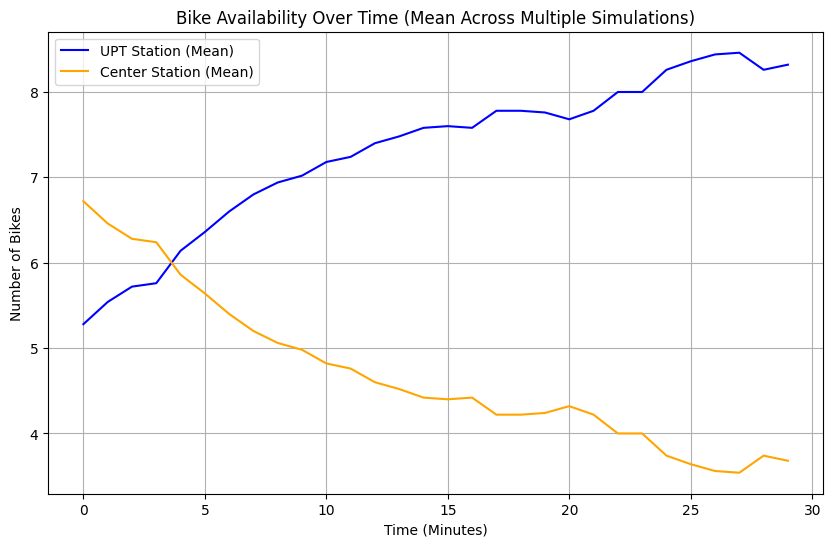

In [ ]:
# Hidden
# option 2 of analysis
import random
import matplotlib.pyplot as plt
import numpy as np

# Class for a Station
class Station:
    def __init__(self, name, bikes, capacity):
        self.name = name            # Station name
        self.bikes = bikes          # Number of bikes available
        self.capacity = capacity

    def status(self):
        return f"{self.name}: {self.bikes}/{self.capacity} bikes available in {self.name}"

    def send_bike(self, other_station):
        if self.bikes > 0 and other_station.bikes < other_station.capacity:
            self.bikes -= 1
            other_station.bikes += 1
            return True, False, False  # Success, no dissatisfaction
        elif self.bikes == 0:
            return False, True, False  # Dissatisfied because no bikes
        elif other_station.bikes == other_station.capacity:
            return False, False, True  # Dissatisfied because no space

# Function to simulate trips and record bike availability over time
def simulate_trips(upt, center, minutes, prob_upt_to_center=0.3, prob_center_to_upt=0.5):
    upt_bikes_over_time = []
    center_bikes_over_time = []

    # Counters for dissatisfied customers
    dissatisfied_no_bike = 0
    dissatisfied_no_space = 0

    # Run the simulation for the specified number of minutes
    for minute in range(minutes):
        # 30% chance to send a bike from UPT to Center
        if random.random() < prob_upt_to_center:
            success, no_bike, no_space = upt.send_bike(center)
            if no_bike:
                dissatisfied_no_bike += 1
            if no_space:
                dissatisfied_no_space += 1

        # 50% chance to send a bike from Center to UPT
        if random.random() < prob_center_to_upt:
            success, no_bike, no_space = center.send_bike(upt)
            if no_bike:
                dissatisfied_no_bike += 1
            if no_space:
                dissatisfied_no_space += 1

        # Record the number of bikes at both stations
        upt_bikes_over_time.append(upt.bikes)
        center_bikes_over_time.append(center.bikes)

    return upt_bikes_over_time, center_bikes_over_time, dissatisfied_no_bike, dissatisfied_no_space

# Function to run multiple simulations and aggregate dissatisfied customers data
def run_multiple_simulations(num_simulations, minutes, prob_upt_to_center=0.3, prob_center_to_upt=0.5):
    all_upt_bikes = []
    all_center_bikes = []

    total_dissatisfied_no_bike = 0
    total_dissatisfied_no_space = 0

    for sim in range(num_simulations):
        print(f"Running simulation {sim + 1}/{num_simulations}")

        # Reset stations for each simulation
        upt_station = Station("UPT", 5, 10)
        center_station = Station("Center", 7, 12)

        # Run the simulation for this instance
        upt_bikes, center_bikes, dissatisfied_no_bike, dissatisfied_no_space = simulate_trips(
            upt_station, center_station, minutes, prob_upt_to_center, prob_center_to_upt
        )

        # Store the results of each run
        all_upt_bikes.append(upt_bikes)
        all_center_bikes.append(center_bikes)

        # Aggregate dissatisfied customers data
        total_dissatisfied_no_bike += dissatisfied_no_bike
        total_dissatisfied_no_space += dissatisfied_no_space

    # Calculate average dissatisfaction per simulation
    avg_dissatisfied_no_bike = total_dissatisfied_no_bike / num_simulations
    avg_dissatisfied_no_space = total_dissatisfied_no_space / num_simulations

    return all_upt_bikes, all_center_bikes, avg_dissatisfied_no_bike, avg_dissatisfied_no_space

# Step 2: Running the simulation 50 times for 30 minutes
num_simulations = 50
minutes = 30

all_upt_bikes, all_center_bikes, avg_dissatisfied_no_bike, avg_dissatisfied_no_space = run_multiple_simulations(
    num_simulations, minutes
)

# Step 3: Output analysis results
print(f"\nAverage number of dissatisfied customers per simulation:")
print(f" - Unable to get a bike: {avg_dissatisfied_no_bike:.2f}")
print(f" - Unable to return a bike: {avg_dissatisfied_no_space:.2f}")

# Step 4: Analysis - Calculate averages over time across simulations

# Convert lists to numpy arrays for easier analysis
upt_bikes_np = np.array(all_upt_bikes)
center_bikes_np = np.array(all_center_bikes)

# Calculate the mean number of bikes at each station over time
upt_bikes_mean = np.mean(upt_bikes_np, axis=0)
center_bikes_mean = np.mean(center_bikes_np, axis=0)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(upt_bikes_mean, label='UPT Station (Mean)', color='blue')
plt.plot(center_bikes_mean, label='Center Station (Mean)', color='orange')
plt.title("Bike Availability Over Time (Mean Across Multiple Simulations)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Number of Bikes")
plt.legend()
plt.grid(True)
plt.show()